In [2]:
import pydot
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Import 'tree' from scikit-learn library
from sklearn import tree


# Data

## Data Preprocessing
### 1. Filling NaNs

In [50]:
train_df=pd.read_csv('data/cld-demo-training-data.csv')
test_df=pd.read_csv('data/cld-demo-test-data.csv')

In [ ]:
print(train_df.isna().sum())
print(test_df.isna().sum())

### 1. Filling in NaN/empty `priority` &`object_code`in `train_df`,`test_df`

In [ ]:
print(train_df.priority.unique())

In [53]:
train_df.priority=train_df.priority.fillna("No_se")
train_df.priority[train_df['priority'] == ' '] = 'No'
train_df.priority[train_df['priority'] == '1'] = 'Si'

In [54]:
test_df.priority=test_df.priority.fillna("No_se")
test_df.priority[test_df['priority'] == ' '] = 'No'
test_df.priority[test_df['priority'] == '1'] = 'Si'

In [ ]:
print(test_df.isna().sum())

In [ ]:
test_df.object_code=test_df.object_code.fillna("No_se")
#test_df=test_df.drop('resource_id3', axis=1)
print(test_df.isna().sum())

In [ ]:
print(train_df.priority.unique())

### 2. Drop columns with only a single value in each column

In [ ]:
print(train_df.T.apply(lambda x: x.nunique(), axis=1)== 1)
print(test_df.T.apply(lambda x: x.nunique(), axis=1)== 1)
test_df=test_df.drop(['resource_id3'], axis=1)
test_df.columns

In [ ]:
print(col[train_df.T.apply(lambda x: x.nunique(), axis=1)== 1])
print(col[test_df.T.apply(lambda x: x.nunique(), axis=1)== 1])

In [ ]:
train_df=train_df.drop(['client', 'service_pool', 'object_code', 'appointment'],axis=1)
print(train_df.columns)
test_df=test_df.drop(['client', 'service_pool', 'object_code', 'appointment'],axis=1)
print(test_df.columns)

#### Keep the original files
**From here I'll work with the new dataframes `train` and `test`**
 

In [75]:
train=train_df.copy()
test=test_df.copy()

### 3. Classify by type of work: `cons, nrg, plumb, carp, stuff`

###  Filtering `train.descrption`/`test.description``

I get a new column with the type of work performed `train.type` and `test.type`

#### Define pattern for filtering and give class names to new column
It's valid for train and test

In [ ]:
pattern_cons='ret|wall|ceiling|buil|cons'
pattern_nrg= 'wiring|media|elect'
pattern_plumb='water system|plumb'
pattern_carp= 'shelving|table|door'
pattern_stuff='stuff|holes|No water|No warn water'
pattern_work=pd.Series([pattern_cons,pattern_nrg,pattern_plumb,
                           pattern_carp,pattern_stuff])

class_str=['constr','elect','plumb','carp','handyman']
class_str

In [77]:
import re

In [78]:
for x in range(5):
    vector={'pattern': pattern_work[x],'type_work':class_str[x]}
    v=pd.Series(train['descrption'])
    v=v.replace("Build a wall and add a new door", "Build a wall and add a new") 
    v=v.str.lower()
    pattern=vector['pattern']
    match_str=x
    v_binary=pd.Series([match_str]*len(v))       
    s=v.str.contains(pattern, flags=re.IGNORECASE, regex=True)
    df=pd.DataFrame(v_binary[s])
    
    if x == 0:
        df0=df
    if x==1:
        df1=pd.DataFrame(df)
    if x == 2:
        df2 =pd.DataFrame(df)
    if x == 3:
        df3 =pd.DataFrame(df)  
    if x == 4:
        df4 =pd.DataFrame(df)

df0=df0.append([df1,df2,df3,df4], sort=False)
train['type']=df0

In [79]:
for x in range(5):
    vector={'pattern': pattern_work[x],'type_work':class_str[x]}
    v=pd.Series(test['descrption'])
    v=v.replace("Build a wall and add a new door", "Build a wall and add a new") 
    v=v.str.lower()
    pattern=vector['pattern']
    match_str=x
    v_binary=pd.Series([match_str]*len(v))       
    s=v.str.contains(pattern, flags=re.IGNORECASE, regex=True)
    df=pd.DataFrame(v_binary[s])
    
    if x == 0:
        df0=df
    if x==1:
        df1=pd.DataFrame(df)
    if x == 2:
        df2 =pd.DataFrame(df)
    if x == 3:
        df3 =pd.DataFrame(df)  
    if x == 4:
        df4 =pd.DataFrame(df)

df0=df0.append([df1,df2,df3,df4], sort=False)
test['type']=df0

In [ ]:
# Count the unique values in ''type' and sort the index
print(train.type.value_counts().sort_index())

# Create a dictionary that maps integers to strings
keys=list(range(0,5))
print(keys)
print(class_str)
val=class_str
mapping = dict(zip(keys,val))

# Convert the 'numbers' integers to strings using the 'mapping'
train['work_type'] = train.type.map(mapping)

# Count the unique values in 'rating'
print(train.work_type.value_counts())

In [185]:
train['work_type'] = train.work_type.astype('category',ordered=True)

In [ ]:
# Count the unique values in ''type' and sort the index
print(test.type.value_counts().sort_index())

# Create a dictionary that maps integers to strings
keys=list(range(0,5))
print(keys)
print(class_str)
val=class_str
mapping = dict(zip(keys,val))

# Convert the 'numbers' integers to strings using the 'mapping'
test['work_type'] = test.type.map(mapping)

# Count the unique values in 'rating'
print(test.work_type.value_counts())

In [184]:
test['work_type'] = test.work_type.astype('category',ordered=True)

In [135]:
c=pd.DataFrame(train['location'])
c.columns=['location']
c.location.value_counts().sort_index(axis=0)

Arts and Humanities Stamford St Lambeth London SE1 9NH                             47
City Council Main Street 1 London NW1 1PS                                         121
Computing Science Guy's Campus King's College London London SE1 1UL                99
Science University London Strand Campus Strand London WC2R 2LS                     60
The Institute of Cancer Research 123 Old Brompton Rd Kensington London SW7 3RP     24
Name: location, dtype: int64

### 4. Encode Labels

In [178]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# Converting string labels into numbers.The labels are int64
c=le.fit_transform(train['location'])
d=le.fit_transform(test['location'])
c=pd.DataFrame(c)
d=pd.DataFrame(d)
c.columns=['loc']
d.columns=['loc']
train['loc2']=c
test['loc2']=d

In [ ]:
# Count the unique values in ''type' and sort the index
print(train.loc2.value_counts().sort_index())
# Create a dictionary that maps integers to strings
keys_l=list(range(0,5))
val_l=['Arts_Stamford','City_Council', 'Computing_College',
    'Science_Univ', 'Cancer_Inst']
print(val_l)
mapping = dict(zip(keys_l,val_l))
print(mapping)
# Convert the 'numbers' integers to strings using the 'mapping'
train['loc1']=train.loc2.map(mapping, na_action=None)
print(train.loc1.value_counts())
train=train.drop(['loc2'], axis=1)

In [201]:
train['loc1'] = train.loc1.astype('category',ordered=True)
#train=train.drop(['location','loc2', descrption','end_date'],axis=1)
train.sample(3)

,work_orer,priority,start_date,error_code,order_type,project,resource_id2,type,work_type,loc1
21,130307,No,2018-10-05 00:00:00.000,4,IO,SERVICE,90080101,2,plumb,Science_Univ
138,130476,No,2018-10-16 00:00:00.000,3,SO,UK100,80080303,4,handyman,City_Council
257,130533,Si,2018-10-19 00:00:00.000,3,SO,UK100,90080101,4,handyman,City_Council


In [183]:
train['loc1'] = train.loc1.astype('category',ordered=True)

In [ ]:
# Count the unique values in ''type' and sort the index
print(test.loc2.value_counts().sort_index())
# Create a dictionary that maps integers to strings
keys_l=list(range(0,5))
val_l=['Arts_Stamford','City_Council', 'Computing_College',
    'Science_Univ', 'Cancer_Inst']
print(val_l)
mapping = dict(zip(keys_l,val_l))
print(mapping)
# Convert the 'numbers' integers to strings using the 'mapping'
test['loc1']=test.loc2.map(mapping, na_action=None)
print(test.loc1.value_counts())
test=test.drop(['loc2'], axis=1)

In [272]:
test['loc1'] = test.loc1.astype('category',ordered=True)
#test=test.drop(['location','descrption','end_date'],axis=1)

In [273]:
train=train.drop(['type'],axis=1)
test=test.drop(['type'],axis=1)
test.head(3)

,work_orer,priority,start_date,error_code,order_type,project,resource_id2,work_type,loc1
0,130720,Si,2018-11-07 00:00:00.000,C,SO,UK100,90020101,constr,City_Council
1,130721,No,2018-11-07 00:00:00.000,C,IO,SERVICE,90020101,constr,Science_Univ
2,130722,Si,2018-11-07 00:00:00.000,C,SO,SERVICE,90020101,constr,Science_Univ


In [208]:
train['priority'] = train.priority.astype('category',ordered=True)
test['priority'] = test.priority.astype('category',ordered=True)

In [209]:
train['error_code'] = train.error_code.astype('category',ordered=True)
test['error_code'] = test.error_code.astype('category',ordered=True)

In [210]:
train['order_type'] = train.order_type.astype('category',ordered=True)
test['order_type'] = test.order_type.astype('category',ordered=True)

In [211]:
train['project'] = train.project.astype('category',ordered=True)
test['project'] = test.project.astype('category',ordered=True)

### 4. Tidy Data

In [212]:
train['resource_id2'] = train.resource_id2.astype('category',ordered=True)
test['resource_id2'] = test.resource_id2.astype('category',ordered=True)

In [214]:
train.head(2)

,work_orer,priority,start_date,error_code,order_type,project,resource_id2,type,work_type,loc1
0,130280,No,2018-10-04 00:00:00.000,E,IO,UK100,90080123,1,elect,City_Council
1,130281,No,2018-10-04 00:00:00.000,3,SO,SERVICE,90080101,4,handyman,Science_Univ


In [215]:
test.head(2)

,work_orer,priority,start_date,error_code,order_type,project,resource_id2,type,work_type,loc1
0,130720,Si,2018-11-07 00:00:00.000,C,SO,UK100,90020101,0,constr,City_Council
1,130721,No,2018-11-07 00:00:00.000,C,IO,SERVICE,90020101,0,constr,Science_Univ


In [274]:
%store train
%store test

Stored 'train' (DataFrame)
Stored 'test' (DataFrame)


## EDA

In [445]:
pd.crosstab(train.resource_id2,train.work_type)

work_type,carp,constr,elect,handyman,plumb
resource_id2,,,,,
80080202,0,0,0,40,11
80080303,3,6,0,44,0
90020101,18,38,0,2,0
90080101,0,0,0,53,2
90080102,0,0,83,0,0
90080123,0,0,51,0,0


### Scatter Matrix

* 0: solo trabaja con fontaneria
* 1: trabaja con constr, carp, pero sobre todo con fontaneria
* 2: constr*, elect,small stuff
* 3: Solo fontaneria*
* 4: Solo Elect
* 5: Solo Elect
    
Summary:
* 2 electricistas: 4, 5
* 2 Fontaneros: 0, 3
* Chapuzas: 1. Chapuzas fontanero: 1
            2. Chapuzas elect: 2

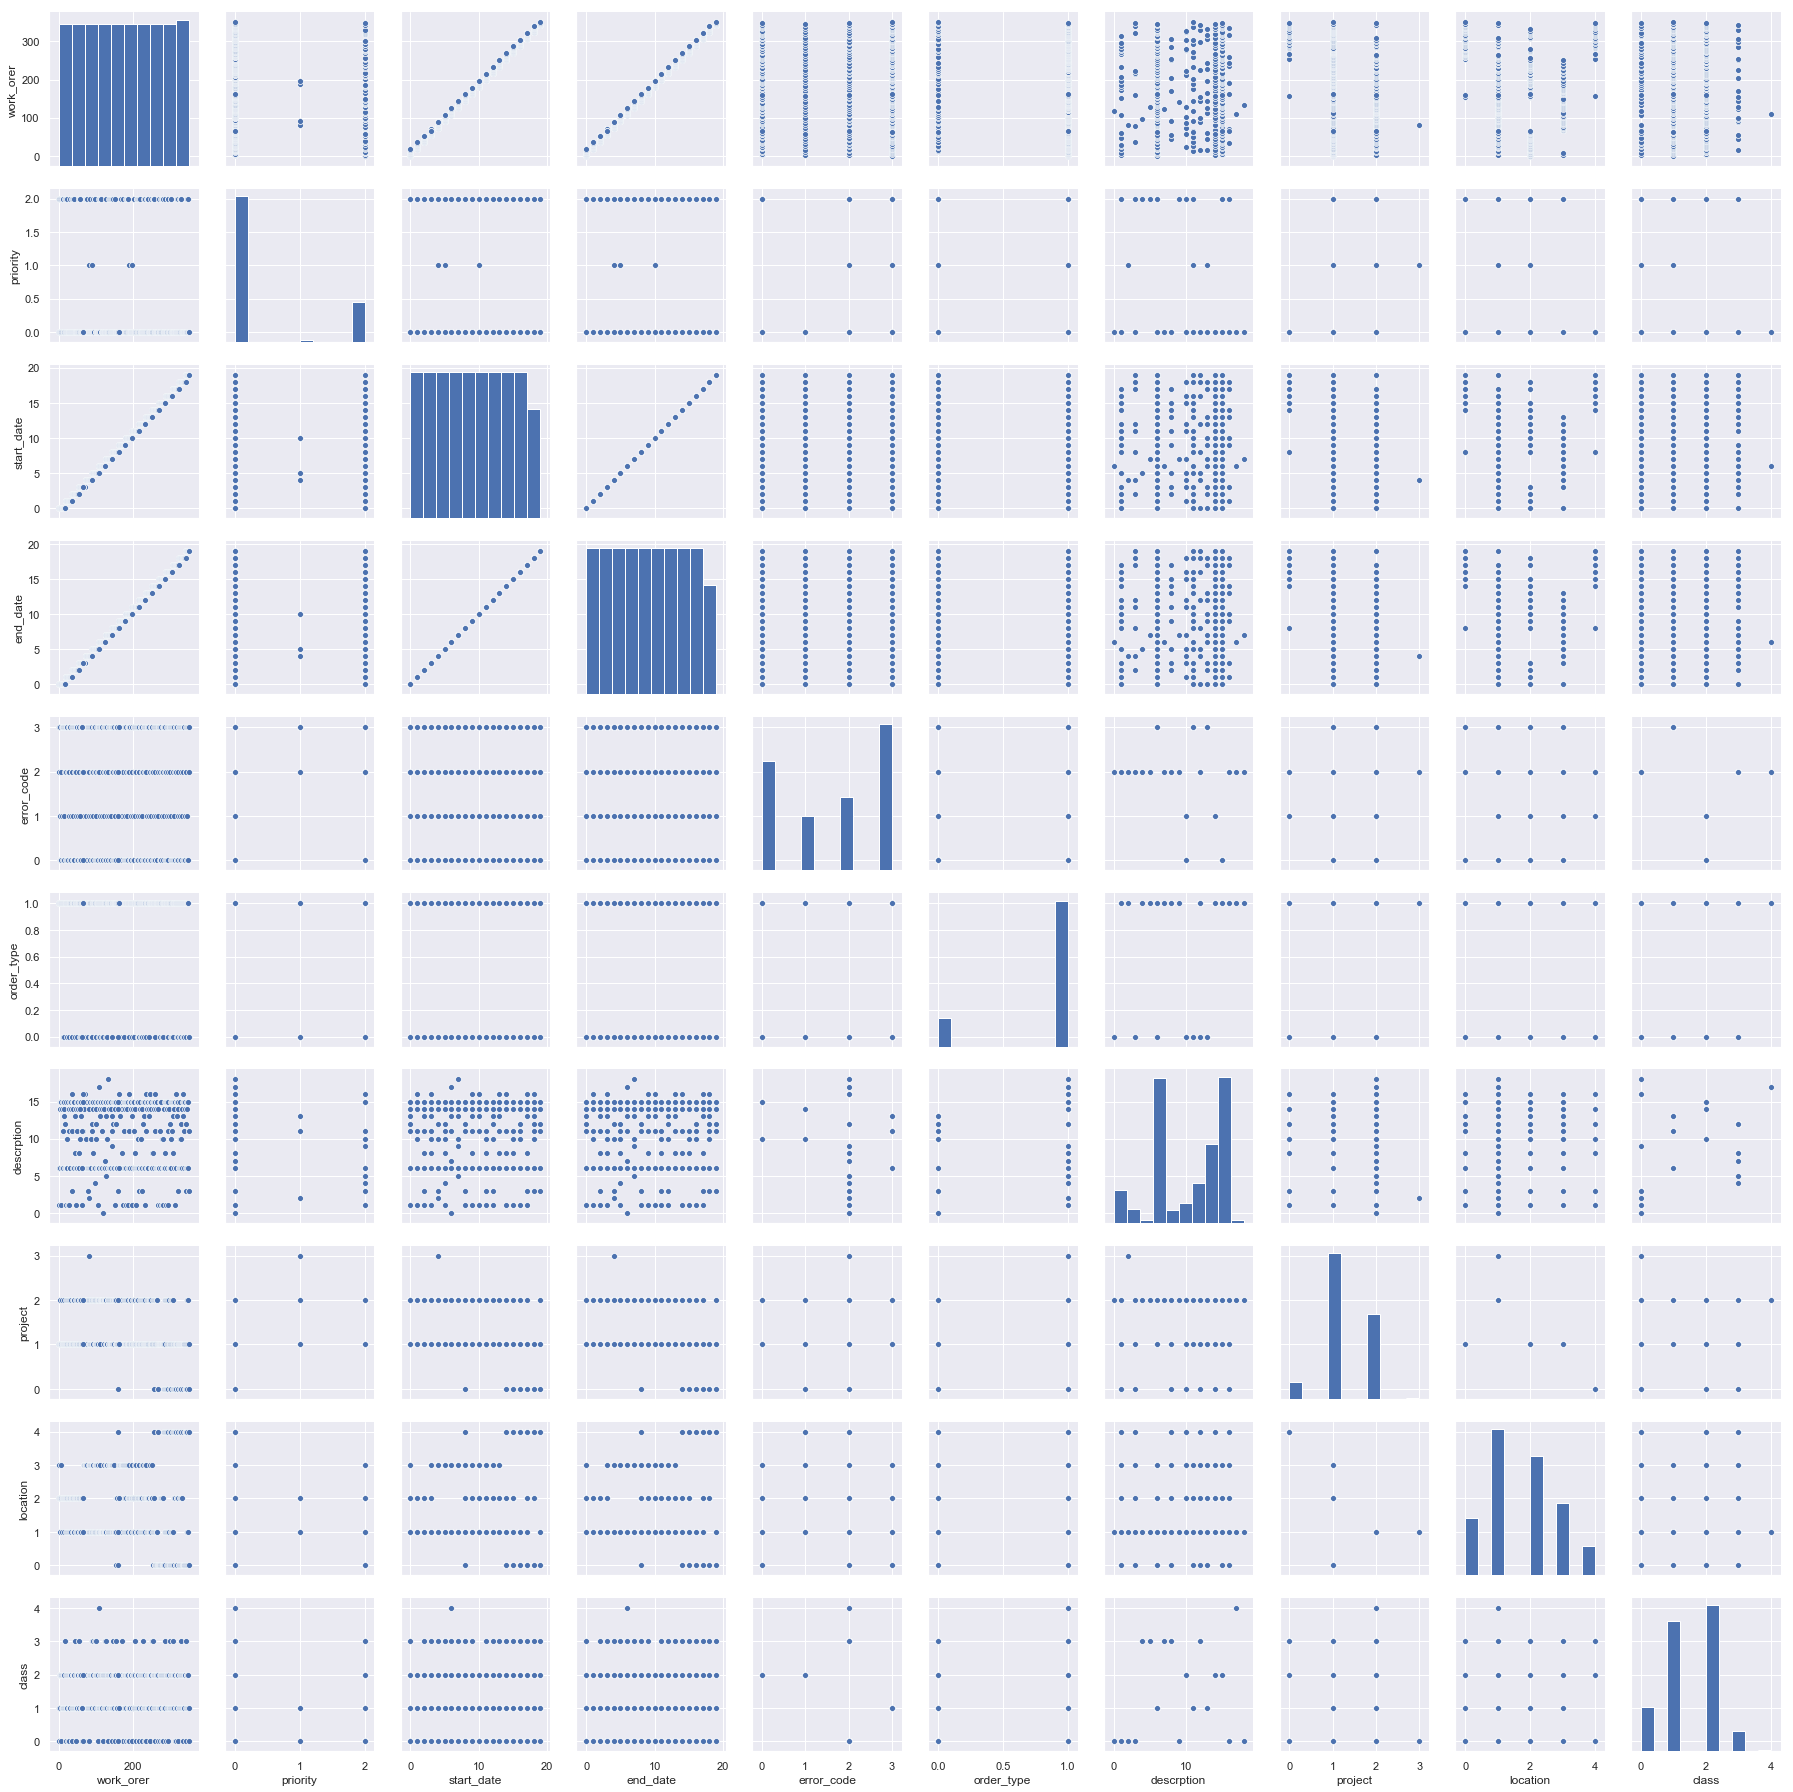

In [65]:
#scatter_matrix(X_train, figsize=[12,12],s=150,alpha=0.2)
#pd.plotting.scatter_matrix(X_train, c=y_train.resource_id2, figsize = [12,12],
#                      s=10, marker = 'D');


### 1. Worker vs. Type of work

* It is possible to appreciate that there is three type of workers:
1. **Electricians**: Only Electricity related tasks: 90080102, 90080123 (**Green**)
2. **Handy-Plumb"**: Both Handyman and Plumbing tasks: 90020101, 0080202 (**Red+purple** bars)
3. **Pure_Handy**: Handyman,Plumbing, costruction: 80080303 (This one doesn't make many construction), 90080101  (**Blue/Orage/Red**)


In [411]:
# Crosstab
worker_workerType=pd.crosstab(train.resource_id2,train.work_type)
worker_workerType

work_type,carp,constr,elect,handyman,plumb
resource_id2,,,,,
80080202,0,0,0,40,11
80080303,3,6,0,44,0
90020101,18,38,0,2,0
90080101,0,0,0,53,2
90080102,0,0,83,0,0
90080123,0,0,51,0,0


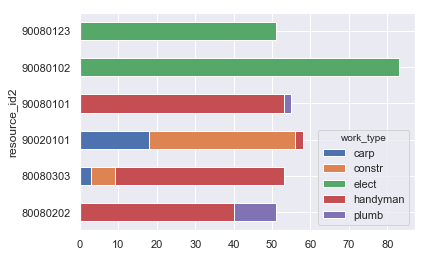

In [223]:
# Create a bar plot of 'k_zones'
worker_workerType.plot(kind='barh', stacked=True)
# Display the plot
plt.show()

### 2. Worker vs. Place

Data much more fuzzy than before

* And Not much Cancer Inst

* Cancer_Inst: Only 3 workers, work there: 90080101,90080102,90080123. Still this place doesn't require a lot of work	

* All workers work at the 5 different places, BUT the "80080303" who doesn't work at Science Univ


In [226]:
# Crossval'
worker_loc=pd.crosstab(train.resource_id2,train.loc1)
worker_loc

loc1,Arts_Stamford,Cancer_Inst,City_Council,Computing_College,Science_Univ
resource_id2,,,,,
80080202,1,3,30,15,2
80080303,8,8,27,10,0
90020101,1,13,16,9,19
90080101,1,0,25,5,24
90080102,26,0,12,36,9
90080123,10,0,11,24,6


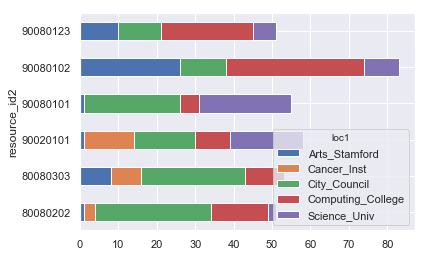

In [227]:
# Create a bar plot of 'k_zones'
worker_loc.plot(kind='barh', stacked=True)
# Display the plot
plt.show()

### 3. Worker vs. Priority

Ä The worker 90080101 is by far taking the high priority tasks, which agree with:
    1. the fact that he works in all places
    2. He is the "pure handyman" of the team

In [250]:
id_priority=pd.crosstab(train.resource_id2,train.priority)
id_priority

priority,No,No_se,Si
resource_id2,,,
80080202,47,0,4
80080303,52,0,1
90020101,47,1,10
90080101,20,0,35
90080102,61,1,21
90080123,46,2,3


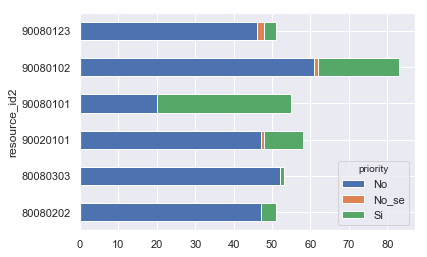

In [251]:
id_priority.plot(kind='barh', stacked=True); plt.show()

### 4. Worker vs. error_code

There is a clear ressemblance with the comparison with the `work_type``

Both variables may be describing the same thing. Careful!

id_error=pd.crosstab(train.resource_id2,train.error_code)
print(id_error)
id_error.plot(kind='barh', stacked=True); plt.show()

error_code   3   4   C    E
work_type                  
carp         0   0  21    0
constr       0   0  44    0
elect        0   0   0  134
handyman    94  43   2    0
plumb        6   7   0    0


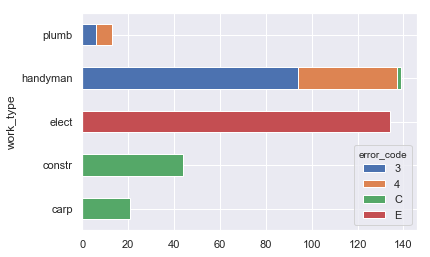

In [254]:
wType_error=pd.crosstab(train.work_type,train.error_code)
print(wType_error)
wType_error.plot(kind='barh', stacked=True); plt.show()

* Electricity = Code E **Red**
* Constr + Carp = Code C (Constructuion) **Green**
* Code 3 and 4 - Handy man () **Orange/blue**

In [ ]:
wType_error=pd.crosstab(train.work_type,train.error_code)
print(wType_error)
wType_error.plot(kind='barh', stacked=True); plt.show()

In [271]:
![EDA]("output.png")

/bin/sh: -c: line 0: syntax error near unexpected token `"output.png"'
/bin/sh: -c: line 0: `[EDA]("output.png")'


# Machine Learning

## Unsuperised: Hierarchical Clustering. Dendograms
(See the other notebook: `unit4_graphs.ipynb`)

### Run the `unit4_graphs.ipynb` NoteBook here and come back

In [343]:
%store -r ct4_5
%store -r ct4
%store -r X_train_1_num
%store -r X_train_2_num
%store -r X_test_1_num
%store -r X_test_2_num
%store -r varieties
%store -r y_test_num

In [345]:
X_test_1_num=X_test_1_num.drop(['work_orer'],axis=1)
X_test_2_num=X_test_2_num.drop(['work_orer'],axis=1)

In [ ]:
print(X_train_1_num.shape, X_train_2_num.shape,varieties.shape)
print(X_test_1_num.shape, X_test_2_num.shape)

In [308]:
X_train_1=train.drop(['work_orer','work_type','priority', 'start_date', 'order_type','resource_id2'], axis=1)
X_train_1.columns

Index(['error_code', 'project', 'loc1'], dtype='object')

In [299]:
ct4_5

varieties,0,1,2,3,4,5
labels,,,,,,
1,51,44,1,55,0,0
2,0,2,28,0,45,30
3,0,7,29,0,38,21


In [311]:
X_train_2=train.drop(['work_orer','start_date', 'order_type','resource_id2'], axis=1)
X_train_2.columns

Index(['priority', 'error_code', 'project', 'work_type', 'loc1'], dtype='object')

In [303]:
ct4

varieties,0,1,2,3,4,5
labels,,,,,,
1,32,36,1,1,0,0
2,19,8,0,54,0,0
3,0,2,28,0,45,30
4,0,6,24,0,9,8
5,0,1,5,0,29,13


#### Prepare the rest of data for the ML

In [325]:
y_train=train['resource_id2'].values
y_test=test['resource_id2'].values

In [312]:
X_test_1=test.drop(['work_orer','work_type','priority', 'start_date', 'order_type','resource_id2'], axis=1)
X_test_2=test.drop(['work_orer','start_date', 'order_type','resource_id2'], axis=1)

In [320]:
y_train_num=varieties 

## 1. K-Nearest Neighbors

In [420]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [354]:
# Create a k-NN classifier
knn_7=KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train_1_num,y_train_num)
y_pred_knn_7_1=knn_7.predict(X_test_1_num)
print(knn_7.score(X_test_1_num,y_test_num))

# Create a k-NN classifier
knn_6=KNeighborsClassifier(n_neighbors=6)
knn_6.fit(X_train_1_num,y_train_num)
y_pred_knn_6_1=knn_6.predict(X_test_1_num)
print(knn_6.score(X_test_1_num,y_test_num))

# Create a k-NN classifier
knn_5=KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train_1_num,y_train_num)
y_pred_knn_5_1=knn_5.predict(X_test_1_num)
print(knn_5.score(X_test_1_num,y_test_num))

# Create a k-NN classifier
knn_4=KNeighborsClassifier(n_neighbors=4)
knn_4.fit(X_train_1_num,y_train_num)
y_pred_knn_4_1=knn_4.predict(X_test_1_num)
print(knn_4.score(X_test_1_num,y_test_num))

# Create a k-NN classifier
knn_3=KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train_1_num,y_train_num)
y_pred_knn_3_1=knn_3.predict(X_test_1_num)
print(knn_3.score(X_test_1_num,y_test_num))

knn_2=KNeighborsClassifier(n_neighbors=2)
knn_2.fit(X_train_1_num,y_train_num)
y_pred_knn_2_1=knn_2.predict(X_test_1_num)
print(knn_2.score(X_test_1_num,y_test_num))

0.711864406779661
0.711864406779661
0.7288135593220338
0.711864406779661
0.7288135593220338
0.6610169491525424


k-nn with max score are k-nn with 5 and 3 neighbors
k-nn with max score are **k-nn** with **5**, 7 neighbors with `X_train_1_num`:
**`'error_code', 'project','loc1'`**

In [381]:
# Create a k-NN classifier
knn_9=KNeighborsClassifier(n_neighbors=8)
knn_9.fit(X_train_2_num,y_train_num)
y_pred_knn_9_2=knn_9.predict(X_test_2_num)
print(knn_9.score(X_test_2_num,y_test_num))

knn_8=KNeighborsClassifier(n_neighbors=8)
knn_8.fit(X_train_2_num,y_train_num)
y_pred_knn_8_2=knn_8.predict(X_test_2_num)
print(knn_8.score(X_test_2_num,y_test_num))

knn_7=KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train_2_num,y_train_num)
y_pred_knn_7_2=knn_7.predict(X_test_2_num)
print(knn_7.score(X_test_2_num,y_test_num))

# Create a k-NN classifier
knn_6=KNeighborsClassifier(n_neighbors=6)
knn_6.fit(X_train_2_num,y_train_num)
y_pred_knn_6_2=knn_6.predict(X_test_2_num)
print(knn_6.score(X_test_2_num,y_test_num))

# Create a k-NN classifier
knn_5=KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train_2_num,y_train_num)
y_pred_knn_5_2=knn_5.predict(X_test_2_num)
print(knn_5.score(X_test_2_num,y_test_num))

# Create a k-NN classifier
knn_4=KNeighborsClassifier(n_neighbors=4)
knn_4.fit(X_train_2_num,y_train_num)
y_pred_knn_4_2=knn_4.predict(X_test_2_num)
print(knn_4.score(X_test_2_num,y_test_num))

# Create a k-NN classifier
knn_3=KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train_2_num,y_train_num)
y_pred_knn_3_2=knn_3.predict(X_test_2_num)
print(knn_3.score(X_test_2_num,y_test_num))

knn_2=KNeighborsClassifier(n_neighbors=2)
knn_2.fit(X_train_2_num,y_train_num)
y_pred_knn_2_2=knn_2.predict(X_test_2_num)
print(knn_2.score(X_test_2_num,y_test_num))

0.711864406779661
0.711864406779661
0.7627118644067796
0.7627118644067796
0.6949152542372882
0.7457627118644068
0.6271186440677966
0.6610169491525424


k-nn with max score are **k-nn** with  **6**, **7** neighbors with `X_train_2_num`:
**`'priority', 'error_code', 'project', 'work_type', 'loc1'`**

### Score with `6-neighboors= 0.76271` ; pred: `y_pred_knn_6_2`

### Comparison:

In [421]:
print(classification_report(y_test_num, y_pred_knn_6_1))

              precision    recall  f1-score   support

           0       1.00      0.46      0.63        13
           1       0.64      1.00      0.78         7
           2       0.80      1.00      0.89         8
           3       0.73      0.92      0.81        12
           4       0.78      0.50      0.61        14
           5       0.38      0.60      0.46         5

   micro avg       0.71      0.71      0.71        59
   macro avg       0.72      0.75      0.70        59
weighted avg       0.77      0.71      0.70        59



In [422]:
print(classification_report(y_test_num, y_pred_knn_6_2))

              precision    recall  f1-score   support

           0       1.00      0.38      0.56        13
           1       0.64      1.00      0.78         7
           2       0.89      1.00      0.94         8
           3       0.71      1.00      0.83        12
           4       0.76      0.93      0.84        14
           5       0.00      0.00      0.00         5

   micro avg       0.76      0.76      0.76        59
   macro avg       0.67      0.72      0.66        59
weighted avg       0.74      0.76      0.71        59



### Grid search Cross-validation. BAD !!!!!

In [368]:
from sklearn.model_selection import GridSearchCV

In [371]:
param_grid={'n_neighbors':np.arange(1,20)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid, cv=5)
knn_cv.fit(X_train_1_num,y_train_num)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 18}
0.5897435897435898


/Users/anacaballero-herrera/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [380]:
knn_18=KNeighborsClassifier(n_neighbors=18)
knn_18.fit(X_train_2_num,y_train_num)
y_pred_knn_18_2=knn_2.predict(X_test_2_num)
print(knn_18.score(X_test_2_num,y_test_num))

0.6779661016949152


## 2. Decission Tree

In [442]:
### Decision tree

# Import 'tree' from scikit-learn library
from sklearn import tree

# Fit your first decision tree: my_tree_one
my_tree_1 = tree.DecisionTreeClassifier()
my_tree_1.fit(X_train_1_num,y_train_num)

# Look at the importance and score of the included features
print(my_tree_1.feature_importances_)
print(my_tree_1.score(X_train_1_num,y_train_num))
print('error_code', 'project', 'loc1')

# Fit your first decision tree: my_tree_one
my_tree_2 = tree.DecisionTreeClassifier()
my_tree_2.fit(X_train_2_num,y_train_num)

# Look at the importance and score of the included features
print(my_tree_2.feature_importances_)
print(my_tree_2.score(X_train_2_num,y_train_num))
print('priority', 'error_code', 'project', 'work_type', 'loc1')

[0.79228 0.00117 0.20655]
0.6552706552706553
error_code project loc1
[0.13932 0.60676 0.02091 0.0613  0.17171]
0.7578347578347578
priority error_code project work_type loc1


## 2. Tunning with RandomizedSearchCV. Decision Tree

## 3. Tunning with RandomizedSearchCV. Decision Tree

In [427]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 3),
              "min_samples_leaf": randint(1, 3),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree,param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train_1_num,y_train_num)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1}
Best score is 0.5754985754985755


/Users/anacaballero-herrera/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [429]:
print('X_train_2_num')
#X_train_2_num
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 5),
              "min_samples_leaf": randint(1, 5),
              "criterion": ["gini", "entropy"]}
tree_cv = RandomizedSearchCV(tree,param_dist, cv=5)
tree_cv.fit(X_train_2_num,y_train_num)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

X_train_2_num
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1}
Best score is 0.6809116809116809


/Users/anacaballero-herrera/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [431]:
param_dist = {"max_depth": [3, None],
              "max_features": 2,
              "min_samples_leaf": 3,
              "criterion": ["gini"]}
tree_cv.fit(X_train_2_num,y_train_num)
y_pred_tree_cv=tree_cv.predict(X_test_2_num)
print(tree_cv.score(X_test_2_num,y_test_num))

0.7627118644067796


/Users/anacaballero-herrera/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [424]:
print(classification_report(y_test_num, y_pred_tree_cv))

              precision    recall  f1-score   support

           0       1.00      0.38      0.56        13
           1       0.75      0.86      0.80         7
           2       1.00      1.00      1.00         8
           3       0.63      1.00      0.77        12
           4       0.74      1.00      0.85        14
           5       0.00      0.00      0.00         5

   micro avg       0.76      0.76      0.76        59
   macro avg       0.69      0.71      0.66        59
weighted avg       0.75      0.76      0.71        59



# Best score `0.7627118`, file `y_pred_tree_cv`

## 3. Random Forest

In [418]:
# Import random forest classifer
from sklearn.ensemble import RandomForestClassifier

# Edit model step in pipeline
pl = Pipeline([
        ('clf', RandomForestClassifier())
    ])

# Fit to the training data
pl.fit(X_train_2_num, y_train_num)
y_pred_random_forest=pl.predict(X_test_2_num)
# Compute and print accuracy
accuracy = pl.score(X_test_2_num, y_test_num)
print("\nAccuracy: ", accuracy)


Accuracy:  0.711864406779661


### Accuracy varies a lot between run and run!!!!!! file: y_pred_random_forest

## Some extras: Not very important 

USING all Features: Choosing correct hyperparameters

### Interaction term

In [195]:
from sklearn.preprocessing import PolynomialFeatures

In [196]:
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_inter=interaction.fit_transform(X_train)

In [200]:
clf_i=OneVsRestClassifier(LogisticRegression())
clf_i.fit(X_inter,y_train)

print(clf_i.score(X_inter,y_train))

0.717948717948718


No!!! Not better. Not eneough data, I think

X_train.head()

<function matplotlib.pyplot.show(*args, **kw)>

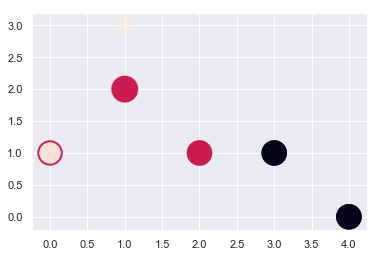

In [251]:
xs=X_train['location']
ys=X_train['project']

plt.scatter(xs,ys,s=(X_train['class']*100+300), c=labels, alpha=0.5)
plt.show

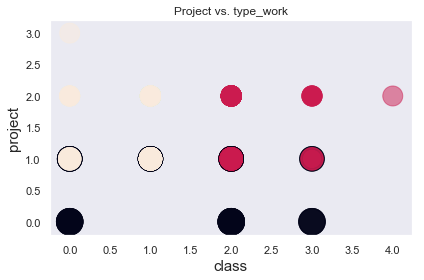

In [254]:
xs=X_train['class']
ys=X_train['project']
fig, ax = plt.subplots()
ax.scatter(xs, ys, c=labels, s=(X_train['location']*100+300), alpha=0.5)

ax.set_xlabel(r'class', fontsize=15)
ax.set_ylabel(r'project', fontsize=15)
ax.set_title('Project vs. type_work')

ax.grid(False)
fig.tight_layout()

In [ ]:
grupo 1: Projectos(0) <-> Type_work(Construction, Plumb, Carp)
grupo 2: Projectos(0,1,2) <-> Type_work(Plumbing, Carp, Stuff)
grupo 3:
    
    ??????

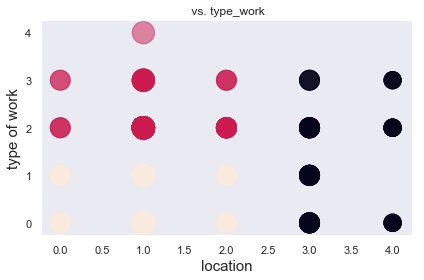

In [258]:
ys=X_train['class']
xs=X_train['location']
fig, ax = plt.subplots()
ax.scatter(xs, ys, c=labels, s=(X_train['project']*100+300), alpha=0.5)

ax.set_xlabel('location', fontsize=15)
ax.set_ylabel('type of work', fontsize=15)
ax.set_title(' Type of work vs. Location')

ax.grid(False)
fig.tight_layout()

In [ ]:
grupo 1: Location(0,1,2)<-> Type_work(Construction, Electricity)
grupo 2: Location(0,1,2)<-> Type_work(Plumbing, Carp, Stuff)
grupo 3: Location(3,4)  <-> Type_work (Construction, Electricity,Plumbing, Carp)

In [306]:
X_train_2=result = pd.concat([X_train, y_train], axis=1, sort=False)
X_train_2.head()
X_test_2=result = pd.concat([X_test, target], axis=1, sort=False)
X_test_2.head()

,priority,error_code,project,location,class,resource_id2
0,2,2,2,1,0,2
1,0,2,1,3,0,2
2,2,2,1,3,0,2
3,0,2,0,4,0,2
4,0,2,2,1,0,2


In [302]:
model=KMeans(n_clusters=4)
model.fit(X_train_2)
labels=model.predict(X_train_2)

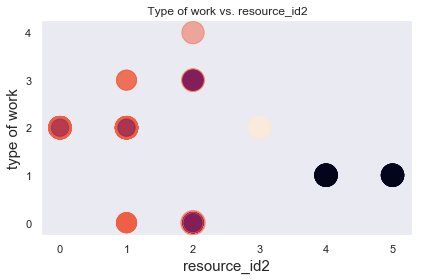

In [305]:
ys=X_train_2['class']
xs=X_train_2['resource_id2']
fig, ax = plt.subplots()
ax.scatter(xs, ys, c=labels, s=(X_train_2['project']*100+300), alpha=0.5)

ax.set_xlabel('resource_id2', fontsize=15)
ax.set_ylabel('type of work', fontsize=15)
ax.set_title(' Type of work vs. resource_id2')

ax.grid(False)
fig.tight_layout()

In [ ]:
Group 0: Constr: only resource 1 and 2
Group 1: Electricians are resources: 4 and 5
Group 2: Only plumb: resource 3
Group 3: Plumb/Carp: resource 0 (Only Plumb),1, 2 (carp)


Plumb= resources 0,1,3

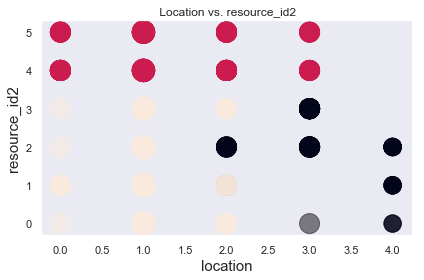

In [300]:
xs=X_train_2['location']
ys=X_train_2['resource_id2']
fig, ax = plt.subplots()
ax.scatter(xs, ys, c=labels, s=(X_train_2['project']*100+300), alpha=0.5)

ax.set_ylabel('resource_id2', fontsize=15)
ax.set_xlabel('location', fontsize=15)
ax.set_title(' Location vs. resource_id2')

ax.grid(False)
fig.tight_layout()

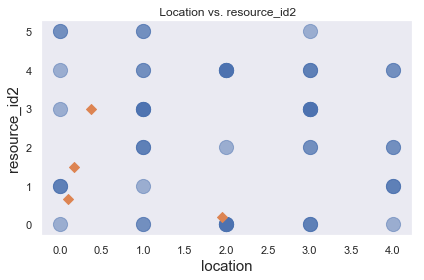

In [313]:
xs=X_test['location']
ys=target

fig, ax = plt.subplots()
ax.scatter(xs, ys, s=200, alpha=0.5)
centroids =model.cluster_centers_
centroids_x=centroids[:,0]
centroids_y=centroids[:,1]
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
ax.set_ylabel('resource_id2', fontsize=15)
ax.set_xlabel('location', fontsize=15)
ax.set_title(' Location vs. resource_id2')

ax.grid(False)
fig.tight_layout()

In [ ]:
centroids =model.cluster_centers_
centroids_x=centroids[:,0]
centroids_y=centroids[:,1]
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
ax.set_ylabel('resource_id2', fontsize=15)
ax.set_xlabel('location', fontsize=15)
ax.set_title(' Location vs. resource_id2')

ax.grid(False)
fig.tight_layout()

In [374]:
zz=pd.crosstab(y_train_cat_class,X_train.location)
zz

location,0,1,2,3,4
resource_id2,,,,,
0,1,30,15,2,3
1,8,27,10,0,8
2,1,16,9,19,13
3,1,25,5,24,0
4,26,12,36,9,0
5,10,11,24,6,0


In [474]:
Xx=pd.DataFrame(X_test_2_num)

In [479]:
Xx['resource_id2_num']=y_test_num
Xx['Pred_tree_cv']=y_pred_tree_cv
Xx['pred_knn_6_2']=y_pred_knn_6_2
Xx['pred_knn_6_1'] =y_pred_knn_6_1

In [ ]:
Xx.to_csv('my.csv')